<a href="https://colab.research.google.com/github/dmuman/ML-labs/blob/main/ir/ir_3var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт необхідних бібліотек
* `pandas` для роботи з даними
* `numpy` для математичних розрахунків
* `matplotlib` та `seaborn` для візуалізації

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Завдання 1

## Огляд датасету

Необхідно з датасету обрати дані за 2014 рік.

Для початку імпортуємо датасет у "сирому форматі" з гітхабу:

In [47]:
# посилання на "сирий" сет
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Individual%20assignment/Ind_var_3/health.csv'

# створення з нього фрейму
df = pd.read_csv(url)

# перегляд перших 5 рядків
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Далі за допомогою індексування можна обрати дані лише за 2014 рік:

In [48]:
# індексування по 2014 році
df_2014 = df[df['Year'] == 2014].copy()

# перегляд результатів
df_2014.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
17,Albania,2014,Developing,77.5,8,0,4.51,428.749067,98,0,...,98,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
32,Algeria,2014,Developing,75.4,11,21,0.01,54.237318,95,0,...,95,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
43,Angola,2014,Developing,51.7,348,67,8.33,23.965612,64,11699,...,68,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
51,Argentina,2014,Developing,76.2,118,8,7.93,847.371746,94,1,...,92,4.79,94,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3


Можна помітити, що у фреймі такі присутні дані лише за 2014 рік. Додатково у цьому можна впевнитись за допомогою функції `unique`:

In [49]:
# унікальні значення
df_2014['Year'].unique()

array([2014])

Дійсно, тільки 2014 рік.

Тепер можна переглянути детальну інформацію про фрейм:

In [50]:
# детальна інформація
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1 to 1634
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          131 non-null    object 
 1   Year                             131 non-null    int64  
 2   Status                           131 non-null    object 
 3   Life expectancy                  131 non-null    float64
 4   Adult Mortality                  131 non-null    int64  
 5   infant deaths                    131 non-null    int64  
 6   Alcohol                          131 non-null    float64
 7   percentage expenditure           131 non-null    float64
 8   Hepatitis B                      131 non-null    int64  
 9   Measles                          131 non-null    int64  
 10   BMI                             131 non-null    float64
 11  under-five deaths                131 non-null    int64  
 12  Polio                     

Маємо $131$ входження (рядки) та $22$ колонки, з яких $20$ є числовими (`float` та `int`) і $2$ категоріальні.

Пропусків у даних немає.

## Попередня обробка фрейму

Спершу треба оновити індекси, аби вони йшли по порядку.

Потім колонки `Country` та `Year` можна видалити, оскільки вони не гратимуть ролі в кластеризації (точніше, вона через них не відбудеться). Оновлені дані можна занести в новий фрейм:

In [51]:
# оновлення індексів
df_2014.index = range(131)

# видалення колонок
df_2014_numeric = df_2014.drop(['Country', 'Year'], axis=1)

### Перекодування

Також можна перекодувати колонку `Status`. Проте спершу треба дізнатись її унікальні значення:

In [52]:
# унікальні значення
df_2014['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Унікальних значень тільки два, тому можна сміло перекодовувати за допомогою `OrdinalEncoder`:

In [53]:
# імпорт OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# створення власного порядку
custom_order = [
    ['Developing', 'Developed']
]

# ініціалізація кодувальника та проведення кодування
encoder = OrdinalEncoder(categories=custom_order)
df_2014_numeric[['Status']] = encoder.fit_transform(df_2014_numeric[['Status']])

# виведення результатів
df_2014_numeric.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,0.0,77.5,8,0,4.51,428.749067,98,0,57.2,1,98,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,0.0,75.4,11,21,0.01,54.237318,95,0,58.4,24,95,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
3,0.0,51.7,348,67,8.33,23.965612,64,11699,22.7,101,68,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4
4,0.0,76.2,118,8,7.93,847.371746,94,1,62.2,9,92,4.79,94,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3


Бачимо, що колонку було перекодовано.

### Стандартизація

Тепер, коли всі дані мають числовий формат, їх можна стандартизувати за допомогою `StandardScaler`:

In [54]:
# імпорт StandardScaler
from sklearn.preprocessing import StandardScaler

# ініціалізація та проведення старндартизації
scaler = StandardScaler()
df_2014_scaled = scaler.fit_transform(df_2014_numeric)

# виведення результатів
df_2014_scaled

array([[-0.41187724, -1.23885357,  1.0082461 , ...,  2.78688733,
        -1.28494454, -0.97681406],
       [-0.41187724,  0.8142666 , -1.38873864, ..., -0.79235032,
         0.605782  ,  0.55610977],
       [-0.41187724,  0.56929204, -1.36139661, ...,  0.20188236,
         0.47309943,  0.62910615],
       ...,
       [-0.41187724,  0.13767018, -0.24037333, ..., -0.77025626,
        -0.48884916, -0.68482857],
       [-0.41187724, -1.0988681 ,  1.40014854, ...,  0.2902586 ,
        -0.66133649, -0.0643594 ],
       [-0.41187724, -1.32051175,  1.91964714, ...,  0.1797883 ,
        -1.13899372, -0.8673195 ]])

# Завдання 2

Необхідно:
* застосувати методику зменшення розмірності для кількісних факторів за допомогою методу PCA, щоб спростити подальший аналіз і підготувати дані для групування.
* інтерпретувати ознаки, отримані після застосування методу головних компонент (PCA).

## Використання методу PCA

Після стандартизації даних, можна зменшити розмірність факторів за допомгою методу PCA:

In [55]:
# імпорт PCA
from sklearn.decomposition import PCA

# встановлення кількості компонент на 0.95
pca = PCA(n_components=0.95)

# проведення зменшення розмірності
df_2014_pca = pca.fit_transform(df_2014_scaled)

# виведення результатів
df_2014_pca

array([[-3.95573975,  0.14785614,  0.08054673, ..., -0.6572175 ,
        -0.34350099,  1.01304374],
       [ 2.04051198,  0.03620524,  0.73786942, ...,  0.20511486,
        -0.04667794, -0.55748792],
       [ 0.94389902,  0.48787614,  1.088094  , ...,  0.38017709,
         0.05222558,  0.07136894],
       ...,
       [-0.31912447, -1.30215407, -1.13576187, ..., -0.36622691,
        -0.16904411,  0.12004491],
       [-2.18922773, -1.03019609,  0.53505372, ...,  1.03180174,
         0.1190836 , -0.0350794 ],
       [-2.28885833, -1.19608863,  0.77270539, ...,  0.39253617,
         0.48348771, -0.53250632]])

## Інтерпретація ознак

Після зменшення розмірності, можна інтерпретувати ознаки головних компонент.

Спершу можна перевірити кількість створених компонент, а також на рівень того, як кожна ознака впливає на ту чи іншу компоненту.

Для цього можна скористатист атрибутом `components_`:

In [56]:
# отримання компонент
components = pca.components_

# створення датафрейму, де компоненти будуть колонками, а ознаки - рядками
components_df = pd.DataFrame(components.T, index=df_2014_numeric.columns, columns=[f'PC{i+1}' for i in range(components.shape[0])])

# виведення результатів
components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Status,0.228997,0.100088,-0.104228,0.220656,0.052799,0.151831,0.559613,-0.201140,-0.613671,-0.225125,-0.026843,0.235249
Life expectancy,0.325500,0.151584,-0.035276,-0.177858,-0.132011,0.088707,0.020128,0.046022,-0.004073,0.169957,-0.104695,-0.003212
Adult Mortality,-0.248198,-0.133412,-0.018988,0.304520,0.384211,-0.056295,0.076953,0.002418,0.178472,-0.239834,0.072529,0.275579
infant deaths,-0.185145,0.429815,-0.119758,-0.023329,0.137266,-0.041701,-0.054733,0.091841,-0.164959,-0.101321,-0.027124,-0.256829
Alcohol,0.236216,0.126227,-0.174612,0.141059,0.182901,0.055874,0.335732,-0.289264,0.644439,-0.268317,-0.126196,-0.281957
percentage expenditure,0.206177,0.109681,-0.178499,0.515291,-0.243014,-0.105028,-0.275195,0.082785,0.047278,-0.052528,0.016560,0.018793
Hepatitis B,0.127073,0.129161,0.532431,0.105962,0.130091,-0.224981,-0.094515,0.030070,-0.007225,-0.012583,-0.399605,0.147412
Measles,-0.109285,0.385822,-0.105547,-0.090313,0.186416,-0.085670,-0.171515,-0.464594,0.121023,0.270921,0.242414,0.563846
BMI,0.239644,-0.009454,-0.135714,-0.296209,0.229303,-0.177352,-0.054592,0.554245,0.066978,-0.458218,0.193930,0.334152
under-five deaths,-0.189553,0.412300,-0.125620,-0.009959,0.148671,-0.048733,-0.055609,0.092380,-0.193610,-0.122105,-0.022009,-0.312637


В даній таблиці представлено вплив кожної ознаки на кожну компоненту.

Для подальших обрахунків можна обрати дві найбільш значущі компоненти. Для цього можна скористатись поясненою дисперсією для кожної ознаки (атрибут `explained_variance_ratio_`):

In [57]:
# пояснена дисперсія для кожної компоненти
explained_variance = pca.explained_variance_ratio_

# вибір індексів двох найбільш значущих ознак
top_two_indices = np.argsort(explained_variance)[-2:][::-1]

# виведення результату
top_two_indices

array([0, 1])

Індекси `0` та `1` тут через те, що дані було відсортовано, це необов'язково означає, що `PC1` та `PC2` є найголовнішими.

Тепер можна переглянути найголовніші ознаки, які впливають на найголовніші компоненти:

In [58]:
for i in range(1, 3):
  print(f'Головні ознаки для головної компоненти PC{i}:')
  # сортування абсолютного значення (модуля) у спадаючому порядку
  # та обрання 5 найголовніших ознак
  print(components_df[f'PC{i}'].abs().sort_values(ascending=False).head(5))
  print()

Головні ознаки для головної компоненти PC1:
Income composition of resources    0.333344
Life expectancy                    0.325500
Schooling                          0.318891
 thinness 5-9 years                0.268712
 thinness  1-19 years              0.254642
Name: PC1, dtype: float64

Головні ознаки для головної компоненти PC2:
Population             0.445003
infant deaths          0.429815
under-five deaths      0.412300
Measles                0.385822
 thinness 5-9 years    0.216173
Name: PC2, dtype: float64



П'ятьма найголовнішими ознаками для `PC1` є:
* композитний індекс
* очікувана тривалість життя
* середні тривалість навчання
* поширеність худорлявості у $5$-$9$ та $1$-$19$ років

**Висновок:** ця компонента охоплює рівень соціально-економічного розвитку та якості життя. Країни з високими значеннями `PC1`, ймовірно, мають високий рівень доходів, якість освіти, кращий доступ до ресурсів та кращий стан здоров’я населення. Ці країни можуть мати високу очікувану тривалість життя та кращу соціальну підтримку.

Для `PC2`:
* населення країни
* кількість смертей немовлят
* кількість смертей дітей до $5$ років
* кількість випадків захворювання на кір
* худорлявість у $5$-$9$ років

**Висновок:** ця компонента охоплює демографічні та медичні проблеми, що впливають на рівень смертності і рівень захворюваності. Країни з високими значеннями PC2 можуть мати високі показники смертності серед немовлят і дітей, великі проблеми з епідемічними захворюваннями (зокрема, кір) і можливі труднощі з доступом до основних медичних послуг.

# Завдання 3

Необхідно:
* виконати кластеризацію на даних, отриманих в результаті зменшення розмірності
* охарактеризувати отримані групи країн за основними демографічними та медичними показниками

## Вибір кількості кластерів

Спершу треба обрати кількість кластерів, на які ми будемо ділити країни. Для цього можна скористатись методом "зігнутого лікця":

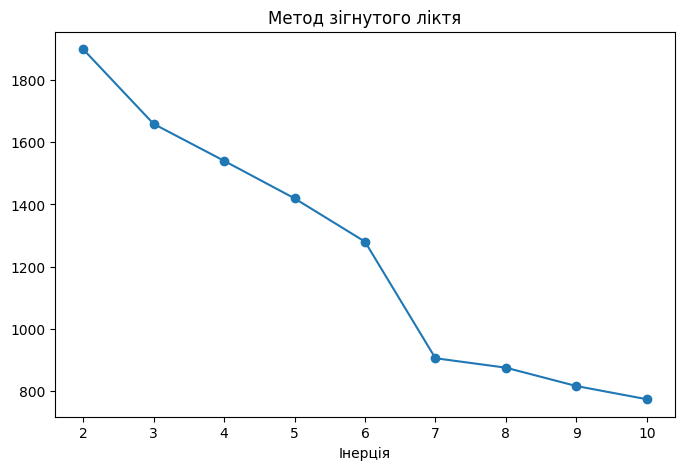

In [59]:
# імпорт бібліотеки KMeans для проведення кластеризації к-середніх
from sklearn.cluster import KMeans

# пустий список інерцій
inertias = []

# перевіримо інерції для 2-10 кластерів
for k in range(2, 11):
  # проведення кластеризації
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_2014_pca)

  # додавання результату в список
  inertias.append(kmeans.inertia_)

# побудова графіка для зручності відображення
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Метод зігнутого ліктя')
plt.xlabel('Кількість кластерів')
plt.xlabel('Інерція')
plt.show()

Можна помітити, що найоптимальнішими є варіанти ("лікоть" на них "згинається") з $3$ та $7$ кластерами. Я оберу варіант поділу на $3$ кластери, бо $7$ буде вже забагато (хоча цей варіант був би кращим з точки зору аналізу графіка).

Додатково можна ще перевірити так звані коефіцієнти силуетів, аби впевнитись у тому, що кількість кластерів було обрано правильно.

In [60]:
# імпорт бібліотеки для вимірювання коефіцієнту
from sklearn.metrics import silhouette_score

# обчислення для 2-10 кластерів
for k in range(2, 11):
  # проведення кластеризації
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2014_pca)
    # обчислення коефіцієнту
    silhouette_avg = silhouette_score(df_2014_pca, labels)
    print(f"Для k = {k}, коефіцієнт силуету = {silhouette_avg}")

Для k = 2, коефіцієнт силуету = 0.2683762117484619
Для k = 3, коефіцієнт силуету = 0.21543729578381834
Для k = 4, коефіцієнт силуету = 0.1517440519030754
Для k = 5, коефіцієнт силуету = 0.1603289628356763
Для k = 6, коефіцієнт силуету = 0.1720481725945727
Для k = 7, коефіцієнт силуету = 0.21876700681009612
Для k = 8, коефіцієнт силуету = 0.14886039832488918
Для k = 9, коефіцієнт силуету = 0.15967337290855055
Для k = 10, коефіцієнт силуету = 0.15386804085519482


Можна помітити, що найвищі показники для $2$, $3$ та $7$ кластерів. Проте, $2$ буде замало, на мою думку. А поділ на $3$ та $7$ доволі схожий за результатами.

Попри це, усі результати є не дуже прямо хорошими, оскільки вже можна сказати, що багато об'єктів будуть накладатись один на одного (результати ближче до $0$, ніж до $1$).

## Кластеризація

Після того, як розмірність було зменшено, а оптимальну кількість кластерів обрано, можна переходити до самої кластеризації:

In [61]:
# кластеризація к-сусідніх на 3 кластери
kmeans = KMeans(n_clusters=3, random_state=42)

# список кластерів
clusters = kmeans.fit_predict(df_2014_pca)

# виведення результаті
clusters

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
      dtype=int32)

Тепер, коли країни було поділено на кластери, основному фрейму (за 2014 рік) можна додати ще одну колонку, яка відповідатиме за номер кластера:

In [62]:
# додавання колонки з номерами кластерів
df_2014['Cluster'] = clusters

# виведення результатів
df_2014.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Cluster
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
1,Albania,2014,Developing,77.5,8,0,4.51,428.749067,98,0,...,5.88,98,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,1
2,Algeria,2014,Developing,75.4,11,21,0.01,54.237318,95,0,...,7.21,95,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4,1
3,Angola,2014,Developing,51.7,348,67,8.33,23.965612,64,11699,...,3.31,64,2.0,479.312240,2692466.0,8.5,8.3,0.527,11.4,0
4,Argentina,2014,Developing,76.2,118,8,7.93,847.371746,94,1,...,4.79,94,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3,1


Тепер, для отримання середніх значень кожної ознаки в кожному кластері, я зроблю те саме й для кластера з лише числовими ознаками:

In [63]:
# додавання колонки з номерами кластерів
df_2014_numeric['Cluster'] = clusters

# отримання середніх значень з заокругленням
cluster_mean = df_2014_numeric.groupby('Cluster').mean().round(2)

# виведення результатів
cluster_mean

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.00,61.46,258.98,70.11,0.67,123.97,72.35,4275.35,23.45,95.85,73.04,5.12,74.11,2.00,1360.56,48277833.62,7.79,8.54,0.51,10.11
1,0.02,73.19,119.40,7.95,3.02,500.00,85.97,1099.92,47.73,9.24,86.81,6.13,86.76,0.19,4939.59,9001005.16,3.57,3.53,0.72,13.27
2,0.82,81.82,71.55,0.73,8.17,3375.56,89.09,75.18,55.30,0.82,95.86,8.10,96.09,0.10,26221.25,5882180.05,1.15,1.14,0.87,16.34


Я буду оцінювати дані кластери по найважливішим ознакам з `PC1` та `PC2`.

**Кластер 0:**
* композитний індекс: $0.51$
* очікувана тривалість життя: $61.46$
* середня тривалість навчання: $10.11$
* поширеність худорлявості у $5$-$9$ років: $8.54$
* поширеність худорлявості у $1$-$19$ років: $7.79$
* населення країни: $48.2$ млн.
* кількість смертей немовлят: $70.11$
* кількість смертей дітей до $5$ років: $95.85$
* кількість випадків захворювання на кір: $4275.35$
* статус: $0.00$

**Висновок:** до цієї групи входять малорозвинені країни, у яких надзвичайно поганий стан як демографічних, так і медичних показників. Мала очікувана тривалість життя, висока дитяча сметрність та величезна кількість захворювань на кір. Також, в середньому, це країни з великим населенням.

**Кластер 1:**
* композитний індекс: $0.72$
* очікувана тривалість життя: $73.19$
* середня тривалість навчання: $13.27$
* поширеність худорлявості у $5$-$9$ років: $3.53$
* поширеність худорлявості у $1$-$19$ років: $3.57$
* населення країни: $9$ млн.
* кількість смертей немовлят: $7.95$
* кількість смертей дітей до $5$ років: $9.24$
* кількість випадків захворювання на кір: $1099.92$
* статус: $0.02$

**Висновок:** до цієї групи входять слабо-середньорозвинені країни. Там, де потрібно, показники вищі. Де непотрібно - нижчі. Середнє населення таких країн набагато нижче, ніж у попереднього кластеру.

**Кластер 2:**
* композитний індекс: $0.87$
* очікувана тривалість життя: $81.82$
* середня тривалість навчання: $16.34$
* поширеність худорлявості у $5$-$9$ років: $1.14$
* поширеність худорлявості у $1$-$19$ років: $1.15$
* населення країни: $5.88$
* кількість смертей немовлят: $0.73$
* кількість смертей дітей до $5$ років: $0.82$
* кількість випадків захворювання на кір: $75.18$
* статус: $0.82$

**Висновок:** до цієї групи входять високорозвинені країни, які мають високу очікувану тривалість життя, низьку дитячу смертність і неймовірно нижчу кількість випадків захворювання на кір. Населення таких країн в середньому становить $\pm6$ мільйонів, що дуже схоже на умовну Данію.

## Відображення результатів

Тепер результати кластеризації можна й зобразити.
Для цього я використаю отримані метрики `PC1` та `PC2`. Подивимось на їхнє відношення:

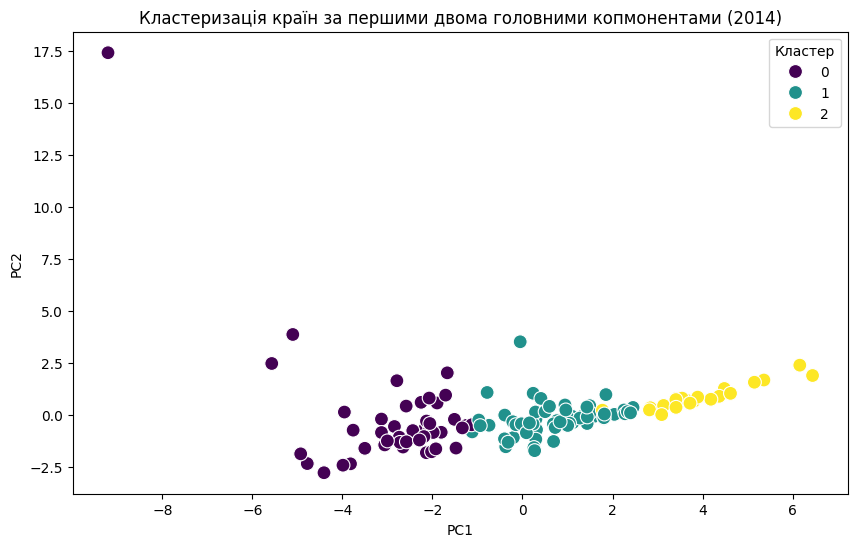

In [64]:
# додамо нові колонки до фрейму по 2014 році,
# які відповідатимуть за метрики PC1 та PC2 для кожної країни
df_2014['Top PC1'] = df_2014_pca[:, top_two_indices[0]]
df_2014['Top PC2'] = df_2014_pca[:, top_two_indices[1]]

plt.figure(figsize=(10, 6))
# діаграма розсіювання
sns.scatterplot(data=df_2014, x='Top PC1', y='Top PC2', hue='Cluster', palette='viridis', s=100)

# назви та написи
plt.title('Кластеризація країн за першими двома головними копмонентами (2014)')
plt.xlabel(f'PC{top_two_indices[0] + 1}')
plt.ylabel(f'PC{top_two_indices[1] + 1}')

# легенда
plt.legend(title='Кластер')

# відображення графіка
plt.show()

Як вже було зазначено вище:
* `PC1` відображає загальний соціально-економічний рівень розвитку країни, якість життя, доступ до ресурсів та стан здоров'я населення.
* `PC2` зосереджується на демографічних та медичних викликах, пов'язаних із смертністю та захворюваністю, і може вказувати на проблеми в системі охорони здоров'я та доступі до базових медичних послуг.

На графіку можна помітити, що зі збільшенням `PC1`, `PC2` стає майже лінійно залежною від `PC1`. Тоді як зі зменшенням `PC1`, `PC2` починає різко рости, що доволі логічно. Чим нижчі соціально-економічні показники - тим вища смертність, захворюваність тощо.

# Висновок

Моїм підходом до попередньої обробки було, як зазвичай, перекодування та стандартизація. Пропусків у даних не було, тому чистити їх не треба було. Перекодував я лише одну колонку, яка відповідала за те, розвинена країна чи досі розвивається. Бінарна класифікація, по суті. Потім усі числові дані я стандартизував - стандартна (масло масляне) практика при роботі з даними.

Методику зменшення розмірності я обрав таку, що зберігатиме 95 відсотків від вибірки. 95, бо це значення, яке відображає більшість. Далі я обрав дві найважливіших компоненти й проаналізував 5 їхніх найважливіших ознак, після чого зробив висновки про те, за що вони відповідають.

Оптимальну кількість кластерів я обрав за допомогою методу "зігнутого ліктя", додатково проаналізувавши коефіцієнти силуетів. Обирав кластери, які мали найбільший коефіцієнт, адже це вказує на те, наскільки об'єкти в кластерах накладаються один на одного (чим вище показник, тим менше накладання, тим кращий результат).

Характеристики (дуже детальні) кожної групи я надав вище.